## Implement hand digit recognition in Keras with dataset at https://keras.io/examples/mnist_dataset_api/ with a simple 3-layer FFNN with fully connected layers (no convolution or other operations).

### Opitimizer 'adam' and loss function 'sparse_categorical_crossentropy'

In [26]:
#importing required modules

import keras
import numpy as np
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.utils import normalize
from tensorflow.nn import relu,softmax

In [27]:
#spliting dataset into training data and teting data

(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [28]:
#scaling the pixel values between 0-1
xtrain = normalize(xtrain,axis=1)
xtest = normalize(xtest,axis=1)


In [29]:
#defining model and adding layers

model = Sequential()
model.add(Flatten())
model.add(Dense(128,activation=relu))
model.add(Dense(10,activation=softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
# training the model
history=model.fit(xtrain,ytrain,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 8s 140us/step - loss: 0.3175 - acc: 0.9119
Epoch 2/3
60000/60000 [==============================] - 7s 108us/step - loss: 0.1422 - acc: 0.9578
Epoch 3/3
60000/60000 [==============================] - 6s 108us/step - loss: 0.0966 - acc: 0.9710


In [31]:
#trained model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [34]:
# calculating the accuracy and loss

loss,accuracy= model.evaluate(xtest,ytest) 
print("Loss :",loss)
print("Accuracy : ",accuracy)

10000/10000 [==============================] - 0s 41us/step
Loss : 0.10255768429301679
Accuracy :  0.9692


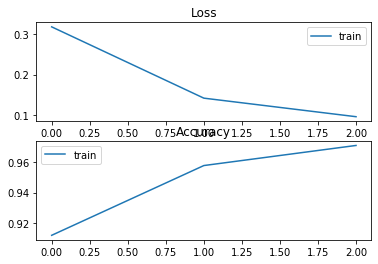

In [37]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.legend()
plt.show()

In [8]:
#prediction

predict = model.predict([xtest])
print(np.argmax(predict[1]))

2


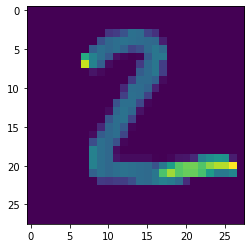

In [15]:


plt.imshow(xtest[1])
plt.show()